In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True)

In [37]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [38]:
df['Age'].isnull().sum()

177

In [39]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [40]:
df['Age'].isnull().sum()

0

In [41]:
df['Embarked'].isnull().sum()

2

In [42]:
df['Embarked'] = df['Embarked'].replace(np.nan,'S')

In [43]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
# data preprocessing

In [45]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [46]:
df['Age'] = df['Age'].astype(int)

In [47]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [48]:
# sex
sex_data_dummies = pd.get_dummies(df['Sex'],prefix = 'Gender',prefix_sep = ':')

In [49]:
sex_data_dummies

,Gender:female,Gender:male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [50]:
df  = pd.concat([sex_data_dummies,df],axis = 1)

In [51]:
type(df)

pandas.core.frame.DataFrame

In [52]:
df.columns.values

array(['Gender:female', 'Gender:male', 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked'], dtype=object)

In [53]:
# data exploratory
df.columns

Index(['Gender:female', 'Gender:male', 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [54]:
mcount = 0
Mgender = df['Gender:male']

for i in range(len(Mgender)):
  if Mgender[i] == 1:
    mcount = mcount+1

mcount
per_m = (mcount/len(Mgender))*100
print('Percentage of male:',per_m)

Percentage of male: 64.75869809203144


In [57]:
per_f = 100 - per_m
print('percentage of female:',per_f)

percentage of female: 35.24130190796856


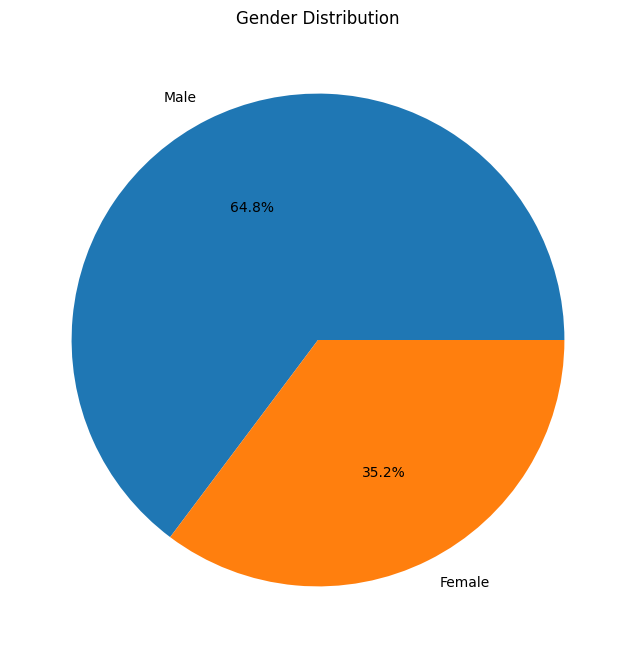

In [60]:
plt.figure(figsize=(8,8))
values = [per_m,per_f]
labels = ['Male','Female']
plt.pie(values,labels=labels,autopct = '%1.1f%%')
plt.title('Gender Distribution')
plt.show()

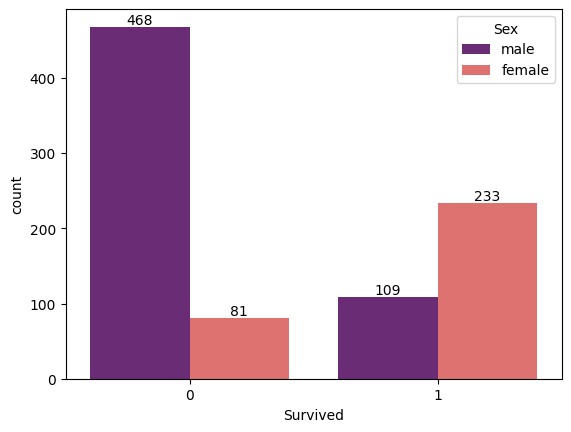

In [61]:
ax = sns.countplot(x = 'Survived',data=df,palette= 'magma',hue='Sex')
for bars in ax.containers:
  ax.bar_label(bars)

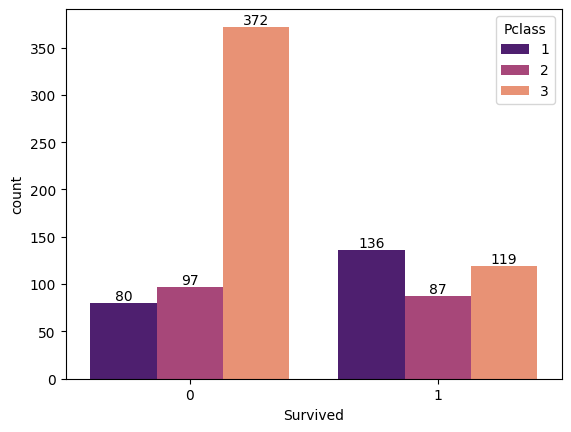

In [64]:
ax = sns.countplot(x = 'Survived',data=df,palette = 'magma',hue = 'Pclass')
for bars in ax.containers:
  ax.bar_label(bars)

In [65]:
df.corr()

<ipython-input-65-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Gender:female,Gender:male,Survived,Pclass,Age,SibSp,Parch,Fare
Gender:female,1.000000,-1.000000,0.543351,-0.131900,-0.080750,0.114631,0.245489,0.182333
Gender:male,-1.000000,1.000000,-0.543351,0.131900,0.080750,-0.114631,-0.245489,-0.182333
Survived,0.543351,-0.543351,1.000000,-0.338481,-0.064909,-0.035322,0.081629,0.257307
Pclass,-0.131900,0.131900,-0.338481,1.000000,-0.339999,0.083081,0.018443,-0.549500
Age,-0.080750,0.080750,-0.064909,-0.339999,1.000000,-0.233066,-0.172745,0.096838
SibSp,0.114631,-0.114631,-0.035322,0.083081,-0.233066,1.000000,0.414838,0.159651
Parch,0.245489,-0.245489,0.081629,0.018443,-0.172745,0.414838,1.000000,0.216225
Fare,0.182333,-0.182333,0.257307,-0.549500,0.096838,0.159651,0.216225,1.000000


<ipython-input-67-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

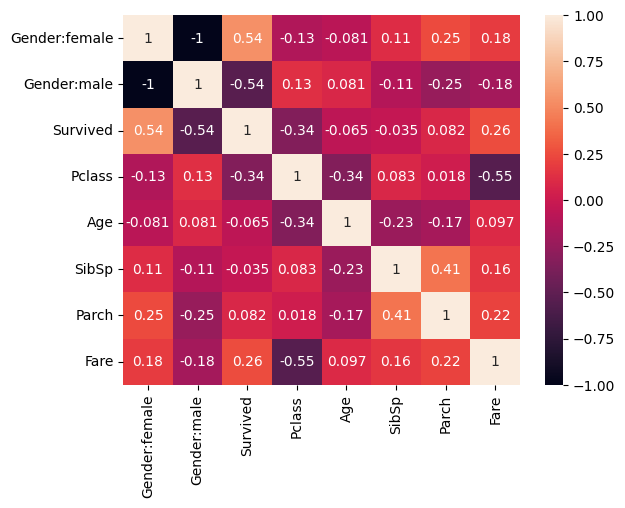

In [67]:
sns.heatmap(df.corr(),annot = True)

In [68]:
# build the model
df.drop(['Sex'],axis = 1, inplace = True)

In [69]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

In [72]:
df.head(1)

,Gender:female,Gender:male,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,22,1,0,7.25,0


In [86]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

In [92]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
X_train.shape

(623, 8)

In [96]:
Y_train.shape

(623,)

In [97]:
y_pred = lr.predict(X_test)

In [98]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1])

In [99]:
from sklearn import metrics

In [101]:
print('Accuracy score on LogisticRegression:',metrics.accuracy_score(Y_test,y_pred))

Accuracy score on LogisticRegression: 0.8246268656716418
